In [132]:
import pandas as pd

g = pd.read_excel("Giant.xlsm", engine="openpyxl")
w = pd.read_excel("walmart1.xlsx", engine="openpyxl")
t = pd.read_excel("Target.xlsm", engine="openpyxl")

w.head()
#t.head()
#w.columns.tolist()

#w.head()
#t.head()

,Walmart_product_url,Walmart_product_name,count,Walmart_product_brand,Walmart_product_type,Walmart_product_price,Helper_1,Helper_2,Helper_3,Helper_4,Helper_5,Helper_6,Walmart_price_per_oz,helper_7,Walmart_price_clean,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,https://www.walmart.com/ip/2-Pack-Dole-Canned-...,(2 Pack ) Dole Canned Crushed Pineapple in 100...,2.0,Dole,Canned Fruit,current price $10.98,8.0,1.372500,NaN,NaN,NaN,137.250000,1.372500,137.250000,10.98,NaN,NaN,NaN
1,https://www.walmart.com/ip/12-Cans-Arizona-Arn...,(12 Cans) Arizona Arnold Palmer Lite Half & Ha...,12.0,Arizona,Beverages,current price $5.48,11.5,0.476522,NaN,NaN,NaN,47.652174,0.476522,47.652174,5.48,NaN,NaN,NaN
2,https://www.walmart.com/ip/12-Cans-Bush-s-Orig...,"(12 Cans) Bush's Original Baked Beans, Canned ...",12.0,Bush's,Protein,current price $23.98,16.0,1.498750,NaN,NaN,NaN,149.875000,1.498750,149.875000,23.98,NaN,NaN,NaN
3,https://www.walmart.com/ip/12-pack-Annie-s-Mac...,"(12 pack) Annie's Yummy Bunnies and Cheddar, M...",12.0,Annie's,Pasta,current price $14.16,6.0,2.360000,19.7 ¢/oz,19.7 ¢,19.7,236.000000,0.197000,19.700000,14.16,NaN,NaN,NaN
4,https://www.walmart.com/ip/12-pack-Barilla-Cla...,"(12 pack) Barilla Classic Non-GMO, Kosher Cert...",12.0,Barilla,Pasta,current price $22.08,16.0,1.380000,NaN,NaN,NaN,138.000000,1.380000,138.000000,22.08,NaN,NaN,NaN


In [133]:
g = g[['product_name_giants', 'giants_unit_price_oz', 'Giant_product_type']].rename(columns={'giants_unit_price_oz': 'giant_price'})
w = w[['Walmart_product_name', 'Walmart_price_per_oz', 'Walmart_product_type']].rename(columns={'Walmart_price_per_oz': 'walmart_price'})
t = t[['target_product_name_adj', 'target_product_price_oz', 'Target_product_type']].rename(columns={'target_product_price_oz': 'target_price'})

g.head()

,product_name_giants,giant_price,Giant_product_type
0,Barilla Al Bronzo Bronze Cut Penne Rigate Pasta,0.18,Pasta
1,Barilla Al Bronzo Bronze Cut Bucatini Pasta,0.22,Pasta
2,Barilla Al Bronzo Bronze Cut Fusilli Pasta,0.18,Pasta
3,Barilla Al Bronzo Bronze Cut Spaghetti Pasta,0.18,Pasta
4,Barilla Al Bronzo Linguine Pasta,0.18,Pasta


In [134]:
w.head()

,Walmart_product_name,walmart_price,Walmart_product_type
0,(2 Pack ) Dole Canned Crushed Pineapple in 100...,1.372500,Canned Fruit
1,(12 Cans) Arizona Arnold Palmer Lite Half & Ha...,0.476522,Beverages
2,"(12 Cans) Bush's Original Baked Beans, Canned ...",1.498750,Protein
3,"(12 pack) Annie's Yummy Bunnies and Cheddar, M...",0.197000,Pasta
4,"(12 pack) Barilla Classic Non-GMO, Kosher Cert...",1.380000,Pasta


In [135]:
t.head()

,target_product_name_adj,target_price,Target_product_type
0,Annie's 2 Pack/6 oz Each Organic Super Mac She...,0.473333,Pasta
1,Annie's 2 Pack/6 oz Each Organic Super Mac She...,0.473333,Pasta
2,Annie's 3 Pack/6 oz Each Organic Super Mac She...,0.473333,Pasta
3,Annie's 3 Pack/6 oz Each Organic Super Mac She...,0.473333,Pasta
4,Annie's Cheddar Squares Baked Snack Crackers -...,0.638667,Pasta


In [136]:
g = g.rename(columns={'product_name_giants': 'product'})
w = w.rename(columns={'Walmart_product_name': 'product'})
t = t.rename(columns={'target_product_name_adj': 'product'})

In [137]:
merged = g.merge(w, on='product', how='outer') \
          .merge(t, on='product', how='outer')

print(merged)

#merged.shape


                                                product  giant_price  \
0     (12 Cans) Arizona Arnold Palmer Lite Half & Ha...          NaN   
1     (12 Cans) Bush's Original Baked Beans, Canned ...          NaN   
2     (12 pack) Annie's Yummy Bunnies and Cheddar, M...          NaN   
3     (12 pack) Barilla Classic Non-GMO, Kosher Cert...          NaN   
4     (12 pack) Barilla Gluten Free Fettuccine Pasta...          NaN   
...                                                 ...          ...   
6269                                                NaN          NaN   
6270                                                NaN          NaN   
6271                                                NaN          NaN   
6272                                                NaN          NaN   
6273                                                NaN          NaN   

     Giant_product_type  walmart_price Walmart_product_type    target_price  \
0                   NaN       0.476522            Bevera

In [138]:

filtered = merged[
    merged[['giant_price', 'walmart_price', 'target_price']].notna().sum(axis=1) >= 2
]

len(filtered)

0

In [139]:
#pip install thefuzz

In [ ]:
#pip install thefuzz


In [140]:
import pandas as pd
from thefuzz import fuzz
from thefuzz import process


In [ ]:
#!pip install thefuzz[speedup]


In [141]:
from thefuzz import fuzz, process
import pandas as pd

def fuzzy_merge(df1, df2, key1, key2, threshold=80):
    s = df2[key2].dropna().tolist()

    matches = df1[key1].apply(lambda x: process.extractOne(x, s, scorer=fuzz.token_sort_ratio) if pd.notnull(x) else None)

    df1['best_match'] = matches.apply(lambda x: x[0] if x and x[1] >= threshold else None)
    df1['match_score'] = matches.apply(lambda x: x[1] if x else None)

    merged = df1.merge(df2, left_on='best_match', right_on=key2, how='outer', suffixes=('', '_matched'))
    return merged

# Step 1: Rename product columns to 'product'
g = g.rename(columns={'product_name_giants': 'product'})
w = w.rename(columns={'Walmart_product_name': 'product'})
t = t.rename(columns={'target_product_name_adj': 'product'})

# Step 2: Normalize product names
for df in [g, w, t]:
    df['product'] = df['product'].str.lower().str.strip()

# Step 3: Fuzzy join Giant and Walmart
merged_gw = fuzzy_merge(g, w, key1='product', key2='product', threshold=85)

# Step 4: Prepare Target dataset
t = t.rename(columns={'product': 'product_target'})
merged_gw['product'] = merged_gw['product'].fillna(merged_gw['best_match']).str.lower().str.strip()

# Step 5: Fuzzy join with Target
final_merged = fuzzy_merge(merged_gw, t, key1='product', key2='product_target', threshold=85)

# Step 6: Rename for clarity
filtered1 = final_merged.rename(columns={
    'giant_price': 'giant_price',
    'walmart_price': 'walmart_price',
    'target_price': 'target_price'
})

# Step 7: View result
print(filtered1[['product', 'giant_price', 'walmart_price', 'target_price']].head())



  product  giant_price  walmart_price target_price
0     NaN          NaN            NaN     0.030391
1     NaN          NaN            NaN      0.05858
2     NaN          NaN            NaN     0.473333
3     NaN          NaN            NaN     0.473333
4     NaN          NaN            NaN     0.473333


# First, extract the relevant columns into a new DataFrame
final_prices = final_merged[['product', 'Giant', 'Walmart', 'Target']]

# Filter: keep only rows with 2 or more non-null prices
final_prices_filtered = final_prices[final_prices[['Giant', 'Walmart', 'Target']].notna().sum(axis=1) >= 2]

# Preview the result
final_prices_filtered.head()
len(final_prices_filtered)


In [142]:
import numpy as np

In [143]:
filtered = filtered1[
    filtered1[['giant_price', 'walmart_price', 'target_price']].notna().sum(axis=1) >= 2
]

len(filtered)
#filtered.head(1500)
array = np.array(filtered)

print(array.shape)


(2247920, 11)


In [104]:
### EDA!!!
t.columns.tolist()

['product_target', 'target_price', 'Target_product_type']

In [111]:
g.head()


,product,giant_price,Giant_product_type,best_match,match_score
0,barilla al bronzo bronze cut penne rigate pasta,0.18,Pasta,None,65
1,barilla al bronzo bronze cut bucatini pasta,0.22,Pasta,None,56
2,barilla al bronzo bronze cut fusilli pasta,0.18,Pasta,None,55
3,barilla al bronzo bronze cut spaghetti pasta,0.18,Pasta,None,71
4,barilla al bronzo linguine pasta,0.18,Pasta,None,58


In [112]:
w.head()


,product,walmart_price,Walmart_product_type
0,(2 pack ) dole canned crushed pineapple in 100...,1.372500,Canned Fruit
1,(12 cans) arizona arnold palmer lite half & ha...,0.476522,Beverages
2,"(12 cans) bush's original baked beans, canned ...",1.498750,Protein
3,"(12 pack) annie's yummy bunnies and cheddar, m...",0.197000,Pasta
4,"(12 pack) barilla classic non-gmo, kosher cert...",1.380000,Pasta


In [113]:
t.head()

,product_target,target_price,Target_product_type
0,annie's 2 pack/6 oz each organic super mac she...,0.473333,Pasta
1,annie's 2 pack/6 oz each organic super mac she...,0.473333,Pasta
2,annie's 3 pack/6 oz each organic super mac she...,0.473333,Pasta
3,annie's 3 pack/6 oz each organic super mac she...,0.473333,Pasta
4,annie's cheddar squares baked snack crackers -...,0.638667,Pasta


In [114]:
# Giant
g_clean = g.rename(columns={
    'giant_price': 'price',
    'product': 'product',
    'Giant_product_type': 'product_type'  # Adjust this if your column has a different name
})
g_clean['store'] = 'Giant'

# Walmart
w_clean = w.rename(columns={
    'walmart_price': 'price',
    'product': 'product',
    'Walmart_product_type': 'product_type'
})
w_clean['store'] = 'Walmart'

# Target
t_clean = t.rename(columns={
    'target_price': 'price',
    'product_target': 'product',
    'Target_product_type': 'product_type'
})
t_clean['store'] = 'Target'


In [115]:
columns = ['product', 'price', 'store', 'product_type']
stacked_all = pd.concat([g_clean[columns], w_clean[columns], t_clean[columns]], ignore_index=True)

stacked_all

,product,price,store,product_type
0,barilla al bronzo bronze cut penne rigate pasta,0.18,Giant,Pasta
1,barilla al bronzo bronze cut bucatini pasta,0.22,Giant,Pasta
2,barilla al bronzo bronze cut fusilli pasta,0.18,Giant,Pasta
3,barilla al bronzo bronze cut spaghetti pasta,0.18,Giant,Pasta
4,barilla al bronzo linguine pasta,0.18,Giant,Pasta
...,...,...,...,...
3970,NaN,Lundberg,Target,NaN
3971,NaN,Annie's,Target,NaN
3972,NaN,Rao's Homemade,Target,NaN
3973,NaN,Oikos,Target,NaN


In [116]:
print(stacked_all['product_type'].unique())

stacked_all1 = stacked_all[~stacked_all['product_type'].str.contains('Mission Carb', case=False, na=False)]



['Pasta' 'Cheese' 'Dairy' 'Rice' 'Canned vegetables' 'Canned Fruit'
 'Prepared Food' 'Bread' 'Canned Vegetables' 'Grain' 'Beverage' 'Protein'
 'Beverages' 'Other' nan]


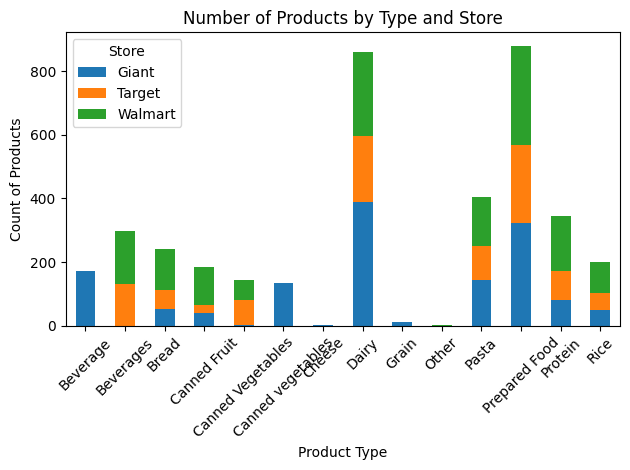

In [117]:
import matplotlib.pyplot as plt
grouped = stacked_all1.groupby(['product_type', 'store']).size().unstack(fill_value=0)

# Step 2: Plot stacked bar chart
grouped.plot(kind='bar', stacked=True)

# Step 3: Customize
plt.title('Number of Products by Type and Store')
plt.xlabel('Product Type')
plt.ylabel('Count of Products')
plt.legend(title='Store')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [118]:
grouped = stacked_all1.groupby(['store', 'product_type'])['price'].mean().reset_index()


In [119]:
pivot_df = grouped.pivot(index='product_type', columns='store', values='price')


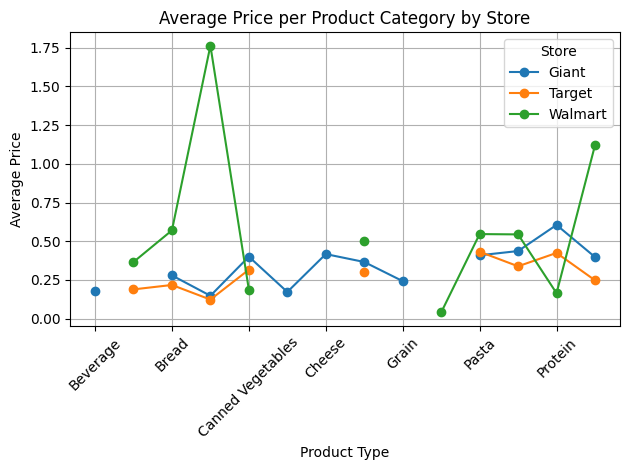

In [120]:
import matplotlib.pyplot as plt

pivot_df.plot(marker='o')  # Optional: marker='o' puts dots on data points
plt.title("Average Price per Product Category by Store")
plt.xlabel("Product Type")
plt.ylabel("Average Price")
plt.xticks(rotation=45)  # Rotate category labels if needed
plt.legend(title='Store')
plt.grid(True)
plt.tight_layout()
plt.show()


In [144]:
filtered.head()
#filtered.drop(columns=['Giant_product_type', 'Target_product_type'], inplace=True)

filtered.rename(columns={'Walmart_product_type': 'product_type'}, inplace=True)
filtered.head()


<ipython-input-144-1c4af875f796>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.rename(columns={'Walmart_product_type': 'product_type'}, inplace=True)


,product,giant_price,Giant_product_type,best_match,match_score,product_matched,walmart_price,product_type,product_target,target_price,Target_product_type
10,annie's deluxe shells & cheddar rice & pasta s...,0.6,Pasta,annie's deluxe gluten free rice pasta shells &...,89.0,NaN,NaN,NaN,annie's deluxe gluten free rice pasta shells &...,0.535455,Pasta
11,annie's deluxe shells & cheddar rice & pasta s...,0.6,Pasta,annie's deluxe gluten free rice pasta shells &...,89.0,NaN,NaN,NaN,annie's deluxe gluten free rice pasta shells &...,0.535455,Pasta
12,annie's deluxe shells & cheddar rice & pasta s...,0.6,Pasta,annie's deluxe gluten free rice pasta shells &...,89.0,NaN,NaN,NaN,annie's deluxe gluten free rice pasta shells &...,0.535455,Pasta
13,annie's deluxe shells & cheddar rice & pasta s...,0.6,Pasta,annie's deluxe gluten free rice pasta shells &...,89.0,NaN,NaN,NaN,annie's deluxe gluten free rice pasta shells &...,0.535455,Pasta
14,annie's deluxe shells & cheddar rice & pasta s...,0.6,Pasta,annie's deluxe gluten free rice pasta shells &...,89.0,NaN,NaN,NaN,annie's deluxe gluten free rice pasta shells &...,0.535455,Pasta


In [131]:
filtered1.head(200)

,product,giant_price,walmart_price,target_price
0,NaN,NaN,NaN,0.030391
1,NaN,NaN,NaN,0.05858
2,NaN,NaN,NaN,0.473333
3,NaN,NaN,NaN,0.473333
4,NaN,NaN,NaN,0.473333
...,...,...,...,...
195,annie's macaroni & cheese shells & real aged c...,0.5,NaN,0.265
196,annie's macaroni & cheese shells & real aged c...,0.5,NaN,0.265
197,annie's macaroni & cheese shells & real aged c...,0.5,NaN,0.265
198,annie's macaroni & cheese shells & real aged c...,0.5,NaN,0.265


In [145]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

df_encoded = pd.get_dummies(filtered, columns=['product_type'], drop_first=True)


In [151]:
# filter fuzzy join
filtered.head()

cols_to_keep = ['product', 'giant_price', 'target_price', 'walmart_price']
filtered = filtered.drop(columns=[col for col in filtered.columns if col not in cols_to_keep])

filtered.head()

,product,giant_price,walmart_price,target_price
10,annie's deluxe shells & cheddar rice & pasta s...,0.6,NaN,0.535455
11,annie's deluxe shells & cheddar rice & pasta s...,0.6,NaN,0.535455
12,annie's deluxe shells & cheddar rice & pasta s...,0.6,NaN,0.535455
13,annie's deluxe shells & cheddar rice & pasta s...,0.6,NaN,0.535455
14,annie's deluxe shells & cheddar rice & pasta s...,0.6,NaN,0.535455


In [152]:
# Features (everything except the price columns)
X = df_encoded.drop(columns=['giant_price', 'walmart_price', 'target_price', 'product'])

# Targets
y_giant = df_encoded['giant_price']
y_walmart = df_encoded['walmart_price']
y_target = df_encoded['target_price']


In [153]:
# Check for missing values in target variables
print("NaNs in y_giant:", y_giant.isna().sum())
print("NaNs in y_walmart:", y_walmart.isna().sum())
print("NaNs in y_target:", y_target.isna().sum())


NaNs in y_giant: 0
NaNs in y_walmart: 0
NaNs in y_target: 720


In [154]:
# Drop rows where any target variable has NaN
df_clean = df_encoded.dropna(subset=['giant_price', 'walmart_price', 'target_price'])

# Redefine target variables after cleaning
y_giant = df_clean['giant_price']
y_walmart = df_clean['walmart_price']
y_target = df_clean['target_price']


In [156]:
# Fill NaNs with the mean of each target variable
df_encoded['giant_price'].fillna(df_encoded['giant_price'].mean(), inplace=True)
df_encoded['walmart_price'].fillna(df_encoded['walmart_price'].mean(), inplace=True)
#df_encoded['target_price'].fillna(df_encoded['target_price'].mean(), inplace=True)

# Redefine target variables
y_giant = df_encoded['giant_price']
y_walmart = df_encoded['walmart_price']
y_target = df_encoded['target_price']


<ipython-input-156-014ab47a69ab>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded['giant_price'].fillna(df_encoded['giant_price'].mean(), inplace=True)
<ipython-input-156-014ab47a69ab>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

In [157]:
from sklearn.linear_model import LinearRegression

model_g = LinearRegression().fit(X, y_giant)
model_w = LinearRegression().fit(X, y_walmart)
model_t = LinearRegression().fit(X, y_target)


ValueError: could not convert string to float: 'Pasta'

In [158]:
# Evaluate the models
print("Giants R²:", model_g.score(X, y_giant))
print("Walmart R²:", model_w.score(X, y_walmart))
print("Target R²:", model_t.score(X, y_target))

NameError: name 'model_g' is not defined

In [ ]:
import pandas as pd
import numpy as np

# Fit the model (assuming you already have model_g from previous steps)
model_g = LinearRegression().fit(X, y_walmart)

# Get the absolute value of the coefficients to assess importance
importance = np.abs(model_g.coef_)

# Create a DataFrame with feature names and importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model_g.coef_,
    'Absolute Importance': importance
})

# Sort by the absolute importance
feature_importance_df = feature_importance_df.sort_values(by='Absolute Importance', ascending=False)

# Display the feature importance matrix
print(feature_importance_df)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Fit the linear regression model for each target (Giants, Walmart, and Target)
model_g = LinearRegression().fit(X, y_giant)
model_w = LinearRegression().fit(X, y_walmart)
model_t = LinearRegression().fit(X, y_target)

# Get the absolute value of the coefficients (importance)
importance_giant = np.abs(model_g.coef_)
importance_walmart = np.abs(model_w.coef_)
importance_target = np.abs(model_t.coef_)

# Create DataFrames to store feature importances for each target
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Giants Importance': importance_giant,
    'Walmart Importance': importance_walmart,
    'Target Importance': importance_target
})

# Sort each column of feature importances
importance_df = importance_df.sort_values(by=['Giants Importance', 'Walmart Importance', 'Target Importance'], ascending=False)

# Display the feature importance matrix
importance_df


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up a heatmap to visualize the feature importance comparison
plt.figure(figsize=(10, 6))
sns.heatmap(importance_df.set_index('Feature').T, annot=True, cmap='Blues', fmt='.3f', cbar=True)
plt.title('Feature Importance Comparison across Targets')
plt.xlabel('Feature')
plt.ylabel('Store')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
# Assuming X (features) and y (target) are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y_walmart, test_size=0.2, random_state=42)


In [ ]:
# Initialize the Linear Regression model
model = LinearRegression()

# Generate the learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Sizes of the training set to test
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Metric for evaluation (you can change this)
    n_jobs=-1  # Use all CPU cores for parallel processing
)


In [ ]:
# Calculate the mean and standard deviation of the scores
train_mean = -train_scores.mean(axis=1)  # Negative because we used 'neg_mean_squared_error'
test_mean = -test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)


In [ ]:
plt.figure(figsize=(10, 6))

# Plot the training and testing error
plt.plot(train_sizes, train_mean, label="Training Error", color="red", linestyle='-', marker='o')
plt.plot(train_sizes, test_mean, label="Testing Error", color="blue", linestyle='-', marker='o')

# Plot the standard deviation as shaded areas
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="red", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="blue", alpha=0.2)

# Add titles and labels
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression

# Fit the Linear Regression model
model = LinearRegression()
model.fit(X, y_walmart)


In [ ]:
# Make predictions on the training data
y_pred = model.predict(X)


In [ ]:
# Calculate residuals
residuals = y_walmart - y_pred


In [ ]:
import matplotlib.pyplot as plt

# Create the residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color="blue", alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Horizontal line at y=0
plt.title('Residual Plot for Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


In [ ]:
# predictions
y_pred = model.predict(X)


In [ ]:
from sklearn.linear_model import LinearRegression

# Train the model
model = LinearRegression()
model.fit(X, y_walmart)

# Predict
y_pred = model.predict(X)

# Show first few predictions
print(y_pred[:5])

print(y_pred[:5])


In [ ]:
predictions_df = X.copy()
predictions_df['Actual'] = y_giant
predictions_df['Predicted'] = y_pred

predictions_df.head()


In [ ]:
#Predict walmart based on giants and target

# Define features and target
X = df_encoded[['giant_price', 'target_price']]  # Add other features if needed
y = df_encoded['walmart_price']


In [ ]:
# If you one-hot encoded product_type earlier
encoded_cols = [col for col in df_encoded.columns if 'product_type' in col]
X = df_encoded[['giant_price', 'target_price'] + encoded_cols]


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)


In [ ]:
# Predict walmart prices using model
walmart_pred = model.predict(X)

# Add to the DataFrame if you want
df_encoded['walmart_predicted'] = walmart_pred

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, walmart_pred)
r2 = r2_score(y, walmart_pred)

print("MSE:", mse)
print("R²:", r2)


In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Create learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(),
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Calculate mean scores (flip sign since it's negative MSE)
train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Error', color='red', marker='o')
plt.plot(train_sizes, test_mean, label='Validation Error', color='blue', marker='o')
plt.title('Learning Curve - Predicting Walmart Prices')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Generate predictions and residuals
y_pred = model.predict(X)
residuals = y - y_pred  # or: df_encoded['walmart_price'] - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='purple')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot - Walmart Price Prediction')
plt.xlabel('Predicted Walmart Price')
plt.ylabel('Residual (Actual - Predicted)')
plt.grid(True)
plt.show()


In [ ]:
#Predict walmart based on giants and target

# Define features and target
X = df_encoded[['walmart_price', 'giant_price']]  # Add other features if needed
y = df_encoded['target_price']


In [ ]:
# If you one-hot encoded product_type earlier
encoded_cols = [col for col in df_encoded.columns if 'product_type' in col]
X = df_encoded[['walmart_price', 'giant_price'] + encoded_cols]


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

In [ ]:
# Predict walmart prices using model
target_pred = model.predict(X)

# Add to the DataFrame if you want
df_encoded['target_predicted'] = target_pred

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, target_pred)
r2 = r2_score(y, target_pred)

print("MSE:", mse)
print("R²:", r2)


In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Create learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(),
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Calculate mean scores (flip sign since it's negative MSE)
train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Error', color='red', marker='o')
plt.plot(train_sizes, test_mean, label='Validation Error', color='blue', marker='o')
plt.title('Learning Curve - Predicting Walmart Prices')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Generate predictions and residuals
y_pred = model.predict(X)
residuals = y - y_pred  # or: df_encoded['walmart_price'] - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='purple')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot - Target Price Prediction')
plt.xlabel('Predicted Target Price')
plt.ylabel('Residual (Actual - Predicted)')
plt.grid(True)
plt.show()